# Letter recognition (small size)

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-09-17 04:37:23--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  14.3MB/s    in 9.4s    

2023-09-17 04:37:33 (11.9 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [2]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

## Data Loading

In [3]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [4]:
x = data['images']
y = data['labels']

In [5]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [6]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )
print(x.shape)

(18724, 28, 28)


* 데이터 살펴보기

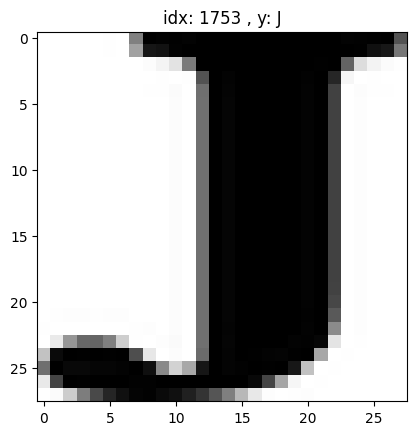

In [8]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='Greys' )
plt.show()

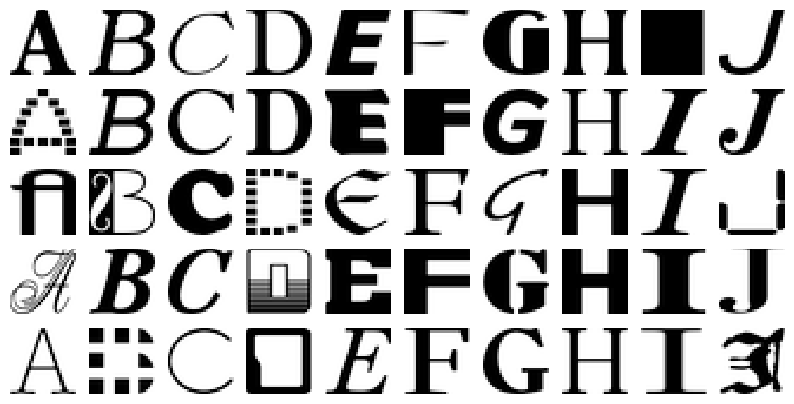

In [9]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='Greys', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

* Scaling

    - min-max scaling

In [11]:
max_n, min_n = x_train.max(), x_train.min()

In [12]:
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [13]:
x_train.max(), x_train.min()

(1.0, 0.0)

* One-hot encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
class_n = len(np.unique(y_train))
class_n

10

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

* Data shape 재확인

In [17]:
x_train.shape, y_train.shape

((14979, 28, 28, 1), (14979, 10))

## Modeling : CNN

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model

In [19]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=[28, 28, 1])

hl = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(il)
hl = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.3)(hl)

hl = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Flatten()(hl)

hl = Dense(1024, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

ol = Dense(10, activation='softmax')(hl)

# 3. 모델 선언
model = Model(il, ol)

# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0     

* Early Stopping

In [21]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

* .fit( )

In [43]:
history = model.fit(x_train, y_train, verbose=1, callbacks=es, validation_split=0.2, epochs=100)

Epoch 1/100
375/375 [==============================] - 4s 11ms/step - loss: 0.4389 - accuracy: 0.8873 - val_loss: 0.2927 - val_accuracy: 0.9329
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2813 - accuracy: 0.9193 - val_loss: 0.2235 - val_accuracy: 0.9413
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2504 - accuracy: 0.9283 - val_loss: 0.2692 - val_accuracy: 0.9279
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2257 - accuracy: 0.9340 - val_loss: 0.2214 - val_accuracy: 0.9443
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2080 - accuracy: 0.9413 - val_loss: 0.2310 - val_accuracy: 0.9396
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1988 - accuracy: 0.9425 - val_loss: 0.2445 - val_accuracy: 0.9319
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1956 - accuracy: 0.9417 - val_loss: 0.2361 - val_accuracy: 0.941

* .evaluate( )

In [44]:
model.evaluate(x_test, y_test)

118/118 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9397


[0.2117912620306015, 0.9396528601646423]

* .predict( )

In [45]:
y_pred = model.predict(x_test)

118/118 [==============================] - 0s 2ms/step


In [46]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(y_test, axis=1)

* 평가 지표

In [47]:
from sklearn.metrics import accuracy_score, classification_report

In [48]:
accuracy_score(test_y_arg, y_pred_arg)

0.939652870493992

In [49]:
print( classification_report(test_y_arg, y_pred_arg) )

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       357
           1       0.90      0.96      0.93       365
           2       0.99      0.89      0.94       374
           3       0.98      0.92      0.95       392
           4       0.92      0.96      0.94       406
           5       0.97      0.98      0.97       377
           6       0.92      0.95      0.93       372
           7       0.96      0.96      0.96       374
           8       0.92      0.90      0.91       385
           9       0.95      0.91      0.93       343

    accuracy                           0.94      3745
   macro avg       0.94      0.94      0.94      3745
weighted avg       0.94      0.94      0.94      3745



## Visualization

* 실제 데이터 확인

idx = 2325
해당 인덱스의 이미지는 I
모델의 예측 : I
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 0.0
F 0.0
G 0.0
H 0.0
I 99.0
J 0.0
정답


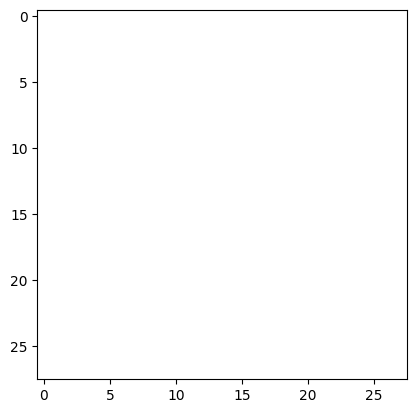

In [50]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test[rand_idx], cmap='Greys')
plt.show()

* 틀린 이미지만 확인해보기

In [51]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

226

idx = 1776
해당 인덱스의 이미지는 E
모델의 예측 : I
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 1.0
F 0.0
G 0.0
H 0.0
I 97.0
J 0.0
땡


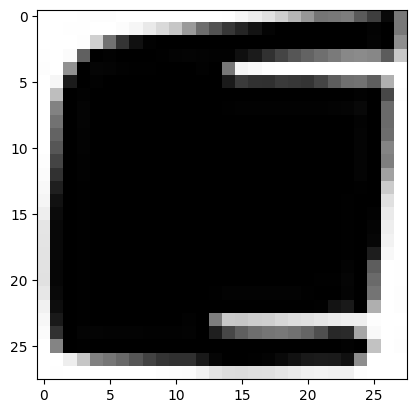

In [52]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test[rand_idx], cmap='Greys')
plt.show()